# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.optimizers as opt

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

In [2]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

def Rescale(x):
    return x/50
    
TYPE=1

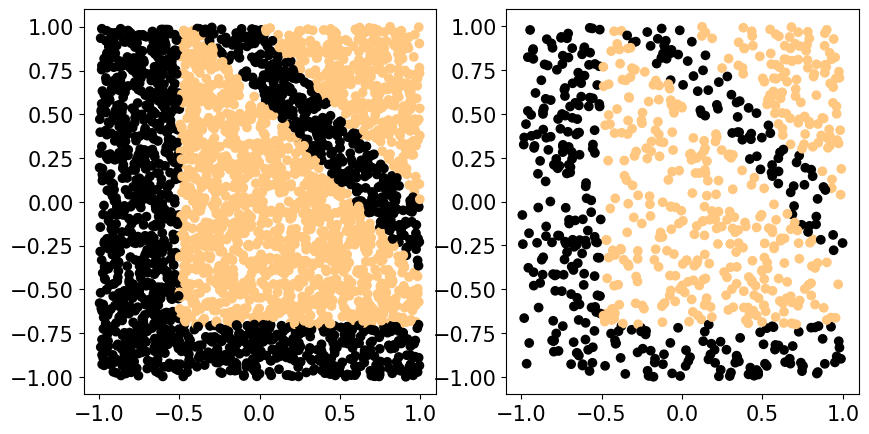

In [3]:
from sklearn.utils import shuffle

best_opt = opt.Nadam
best_learning_rate = 0.01
best_dropout = 0.1

losses=[]
accs=[]

x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

(x, y) = shuffle(x,y)

N = len(x)
L = len(x[0])

perc_train = 0.8
N_train = int(perc_train * N)

(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

fig, AX = plt.subplots(1,2,figsize=(10,5))

ax = AX[0]
ax.scatter(x_train[:,0],x_train[:,1],c=y_train)

ax = AX[1]
ax.scatter(x_valid[:,0],x_valid[:,1],c=y_valid)

100
25/25 [==============================] - 0s 1ms/step
3200 0.03617359325289726 0.9825000166893005
95
25/25 [==============================] - 0s 1ms/step
3040 0.28266531229019165 0.875
90
25/25 [==============================] - 0s 1ms/step
2880 0.14884361624717712 0.9587500095367432
85
25/25 [==============================] - 0s 1ms/step
2720 0.045615922659635544 0.9787499904632568
80
25/25 [==============================] - 0s 1ms/step
2560 0.06646279245615005 0.9750000238418579
75
25/25 [==============================] - 0s 1ms/step
2400 0.2849641442298889 0.8737499713897705
70
25/25 [==============================] - 0s 1ms/step
2240 0.047997020184993744 0.9825000166893005
65
25/25 [==============================] - 0s 1ms/step
2080 0.291780024766922 0.875
60
25/25 [==============================] - 0s 1ms/step
1920 0.280875563621521 0.8812500238418579
55
25/25 [==============================] - 0s 633us/step
1760 0.2807564437389374 0.8712499737739563
50
25/25 [=================

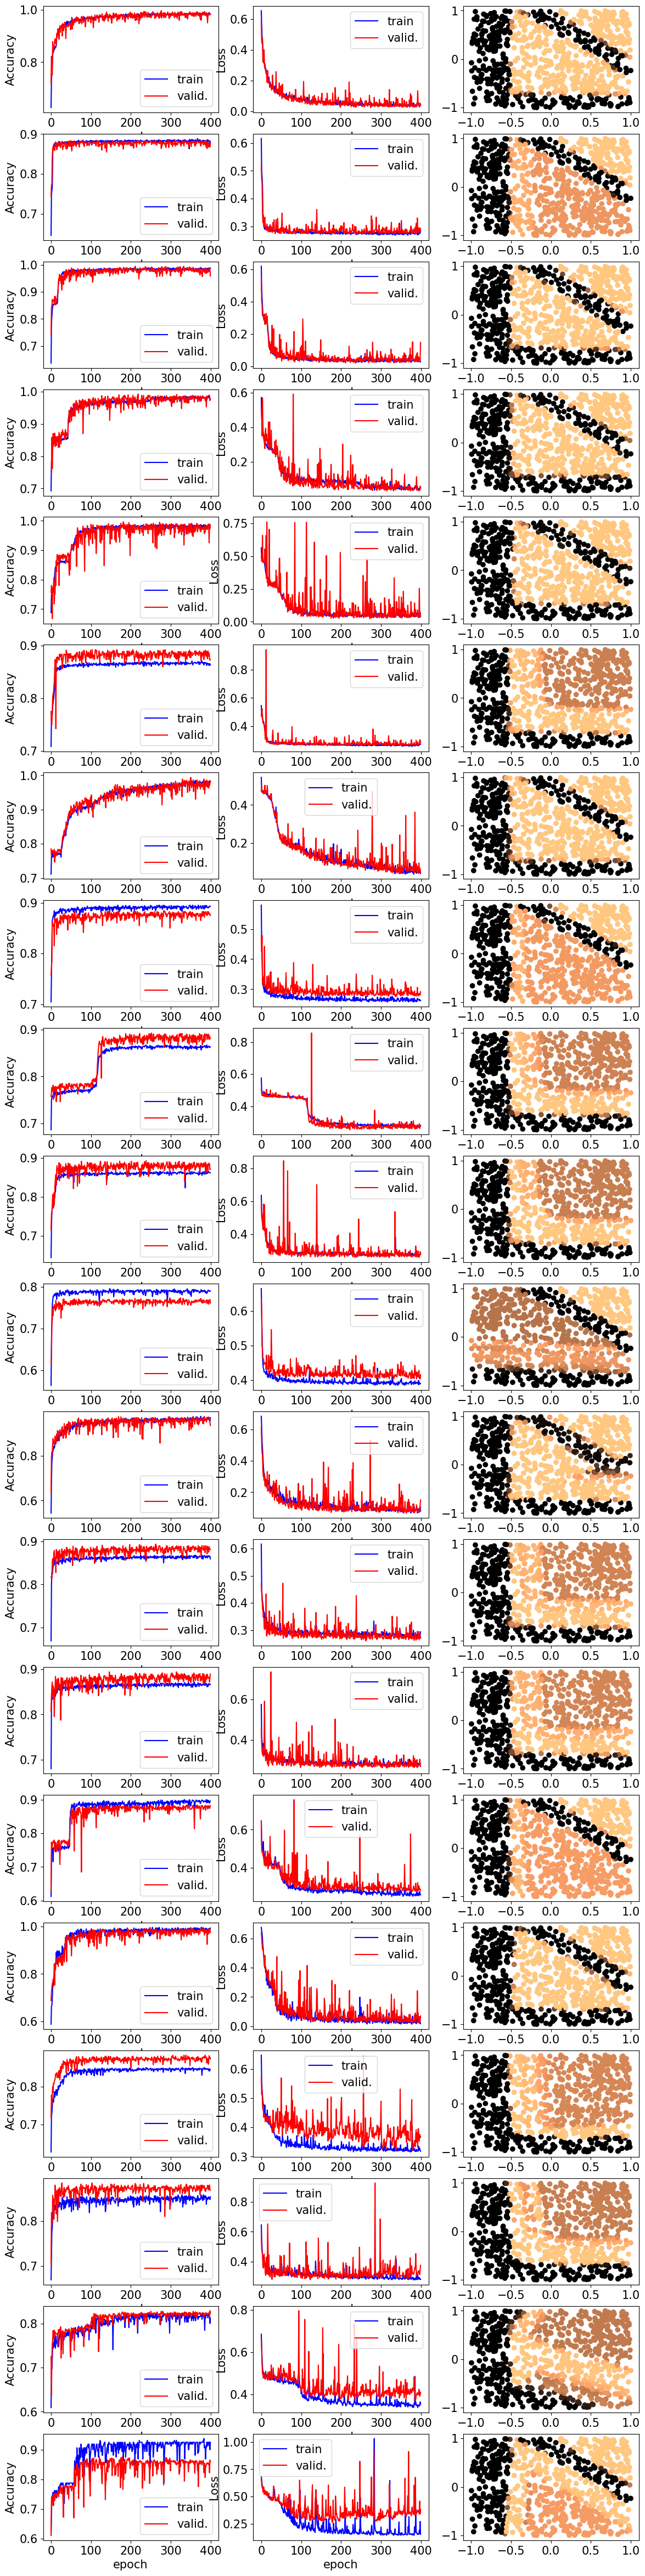

In [4]:
fig,AX=plt.subplots(20,3,figsize=(14,60))
c=0

    
for n in range(100, 0, -5):
    print(n)
    (x_train, y_train) = shuffle(x_train, y_train)
    (x_train, y_train) = (x_train[0:int(N_train*n/100)],y_train[0:int(N_train*n/100)]) 
    
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(best_dropout))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400

    model.compile(loss='binary_crossentropy',
                    optimizer=best_opt(learning_rate=best_learning_rate),
                    metrics=['accuracy'])
    
    fit = model.fit(x_train, y_train,
                    epochs = nepoch, batch_size = 50,
                    validation_data=(x_valid,y_valid),
                    verbose=0)
    
    results = model.evaluate(x_valid, y_valid)
    predictions = model.predict(x_valid)    

    loss, acc = results
    losses.append(loss)
    accs.append(acc)
    #print(len(x_train),loss,acc)
    
    ax=AX[c][0]
    ax.plot(fit.history['accuracy'],label="train",c="b")
    ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax=AX[c][1]
    ax.plot(fit.history['loss'],label="train",c="b")
    ax.plot(fit.history['val_loss'],label="valid.",c="r")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.legend()
    ax=AX[c][2]
    ax.scatter(x_valid[:,0],x_valid[:,1],c=predictions)
    c+=1

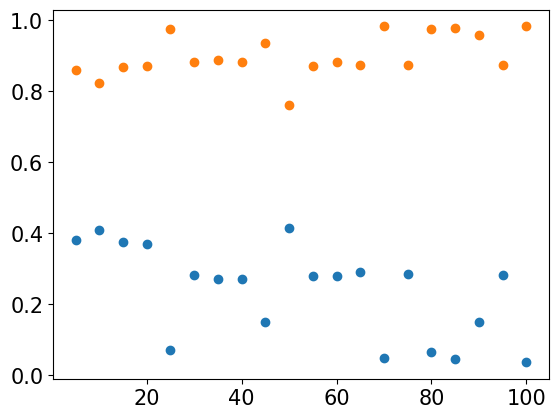

In [6]:
mpl.pyplot.scatter(np.arange(100, 0, -5),losses)
mpl.pyplot.scatter(np.arange(100, 0, -5),accs)